# Test P18 SMICA_NOSZ

In [1]:
# some_file.py
import sys
# insert at 1, 0 is the script path (or '' in REPL)

sys.path.insert(1, '/home/jaimerz/PhD/xCell')

from xcell.mappers import MapperP18SMICA
from xcell.mappers import utils
from astropy.io import fits
from astropy.table import Table
import pyccl as ccl
import numpy as np
import pylab as plt
import pymaster as nmt
import healpy as hp
import numpy as np

In [2]:
ells = [0, 30, 60, 90, 120, 150, 180, 210, 240, 272, 309, 351, 398, 452, 513, 582, 661, 750, 852, 967, 1098, 1247, 1416, 1536, 1608, 1826, 2073, 2354, 2673, 3072]
bands = nmt.NmtBin.from_edges(ells[:-1], ells[1:])
ell_arr = bands.get_effective_ells()

In [5]:
path = '/home/jaimerz/PhD/xCell/data/SMICA/'
c = {'file_map': path+'COM_CMB_IQU-smica-nosz_2048_R3.00_full.fits',
     'file_hm1': path+'COM_CMB_IQU-smica-nosz_2048_R3.00_hm1.fits', 
     'file_hm2': path+'COM_CMB_IQU-smica-nosz_2048_R3.00_hm2.fits',
     'file_mask': None,
     'file_gp_mask': path+'HFI_Mask_GalPlane-apo2_2048_R2.00.fits',
     'file_sp_mask': path+'HFI_Mask_PointSrc_2048_R2.00.fits',
    'nside':1024}
path = '/home/jaimerz/PhD/xCell/'
c_test = {'file_map': path+'xcell/tests/data/hm1_map.fits',
            'file_hm1': path+'xcell/tests/data/hm1_map.fits',
            'file_hm2': path+'xcell/tests/data/hm2_map.fits',
            'file_mask': None,
            'file_gp_mask': path+'xcell/tests/data/mask1.fits',
            'file_sp_mask': path+'xcell/tests/data/mask2.fits',
            'gal_mask_mode': '0.2',
            'nside': 32}

In [6]:
mapper = MapperP18SMICA(c)
full = mapper.get_signal_map()
full_f = mapper.get_nmt_field()
hm1, hm2 = mapper._get_hm_maps()
hm1_f = mapper._get_nmt_field(signal=hm1)
hm2_f = mapper._get_nmt_field(signal=hm2)
diff = mapper._get_diff_map()
diff_f = mapper.get_nmt_field(signal=diff)
mask= mapper.get_mask()

In [7]:
len(mask) == 12 * 32**2

False

/home/jaimerz/.local/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/home/jaimerz/.local/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/home/jaimerz/.local/lib/python3.8/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a reg

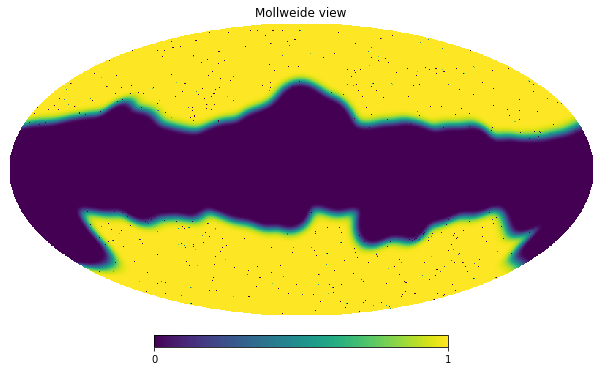

In [8]:
hp.visufunc.mollview(mask)

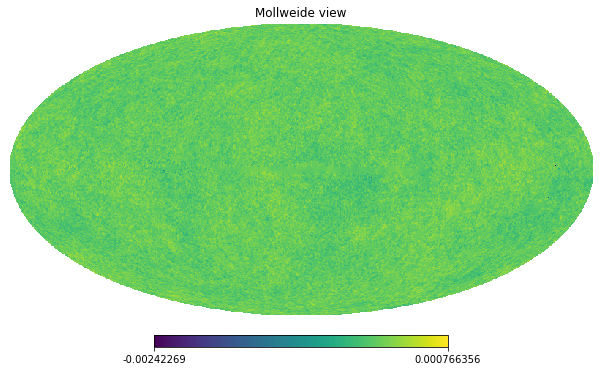

In [9]:
hp.visufunc.mollview(full[0])

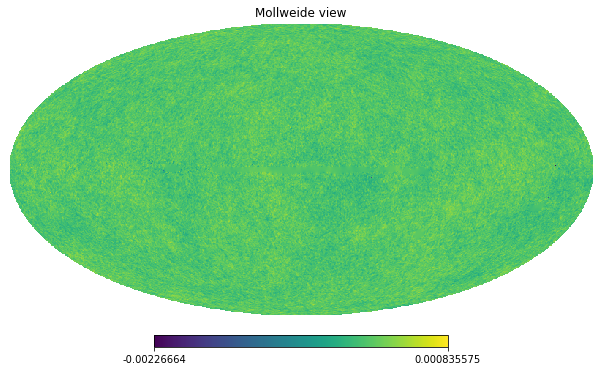

In [10]:
hp.visufunc.mollview(hm1[0])

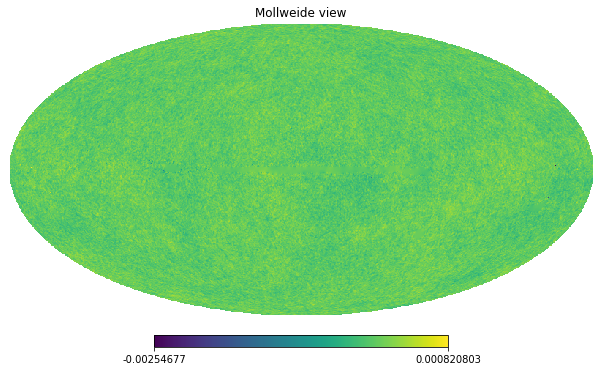

In [11]:
hp.visufunc.mollview(hm2[0])

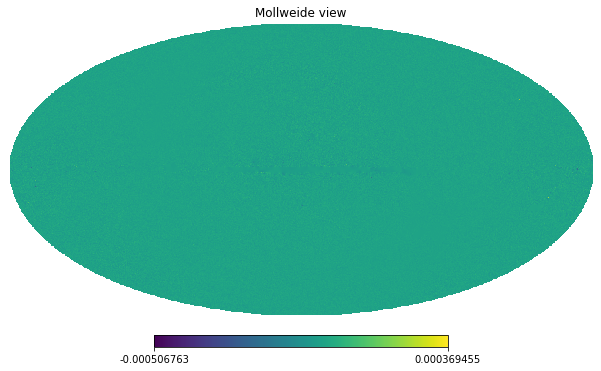

In [12]:
hp.visufunc.mollview(diff[0])

In [13]:
ws_full = nmt.NmtWorkspace()
ws_full.compute_coupling_matrix(full_f, full_f, bands)

In [14]:
ws_diff = nmt.NmtWorkspace()
ws_diff.compute_coupling_matrix(diff_f, diff_f, bands)

In [15]:
ws_hm12 = nmt.NmtWorkspace()
ws_hm12.compute_coupling_matrix(hm1_f, hm2_f, bands)

In [16]:
# Noise
nl_c = mapper.get_nl_coupled()
nl_dc = ws_diff.decouple_cell(nl_c)

# With noise
cl_full_c = nmt.compute_coupled_cell(full_f, full_f)
cl_full_dc = ws_full.decouple_cell(cl_full_c) 

# Already without noise
cl_fl_c = nmt.compute_coupled_cell(hm1_f, hm2_f)
cl_fl_dc = ws_hm12.decouple_cell(cl_fl_c) 

In [17]:
dl_full_dc = ell_arr*(ell_arr+1)*cl_full_dc/(2*np.pi)
dl_full_dc *= (2.7260*10**6)**2
dl_fl_dc = ell_arr*(ell_arr+1)*cl_fl_dc/(2*np.pi)
dl_fl_dc *= (2.7260*10**6)**2

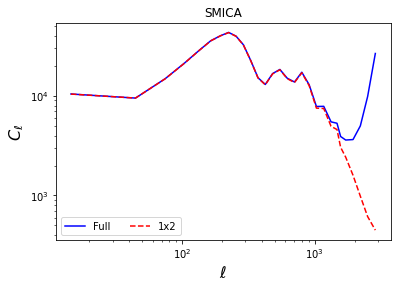

In [18]:
plt.plot(ell_arr, dl_full_dc[0], 'b-', label='Full')
plt.plot(ell_arr, dl_fl_dc[0], 'r--', label='1x2')
#plt.plot(ell_arr, cross_corr_theory , 'r--', label='Theory')
#plt.plot(ref['ell'], ref['cl'] , 'b--', label='Reference')
plt.loglog()
plt.title('SMICA')
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='lower left', ncol=2, labelspacing=0.1)
plt.show()